<a href="https://colab.research.google.com/github/AlanHTL/tszlun/blob/main/seem3650.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The Chinese University of Hong Kong

SEEM3650

Introduction to Data and Decision Analytics

Professor NGUYEN Viet Anh

5/5/2024


Huang Tsz Lun 1155174772

Lam Ho Man 1155176598

Wong Sze Hok 1155149484


# Data Description


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_excel('BigData.xlsx', sheet_name ='data')
data.head()

,DATE,HPI,SnP,MACD,CPI,HSIC,H_RATE
0,1999-01-01,55.79,8417,-6.918074,75.5,9506.900391,6.37054
1,1999-02-01,55.47,7451,-6.811816,75.2,9858.490234,6.04000
2,1999-03-01,55.29,9507,-6.665297,74.7,10942.200195,5.67411
3,1999-04-01,56.18,9061,-6.403547,74.5,13333.200195,4.79241
4,1999-05-01,57.02,10928,-6.058490,74.4,12147.120117,5.16518


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302 entries, 0 to 301
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   DATE    302 non-null    datetime64[ns]
 1   HPI     302 non-null    float64       
 2   SnP     302 non-null    int64         
 3   MACD    302 non-null    float64       
 4   CPI     302 non-null    float64       
 5   HSIC    302 non-null    float64       
 6   H_RATE  302 non-null    float64       
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 16.6 KB


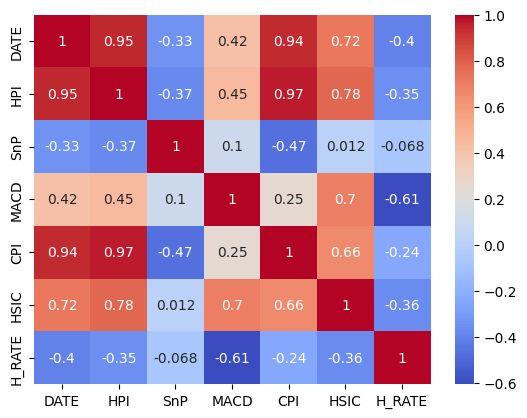

In [ ]:
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.show()

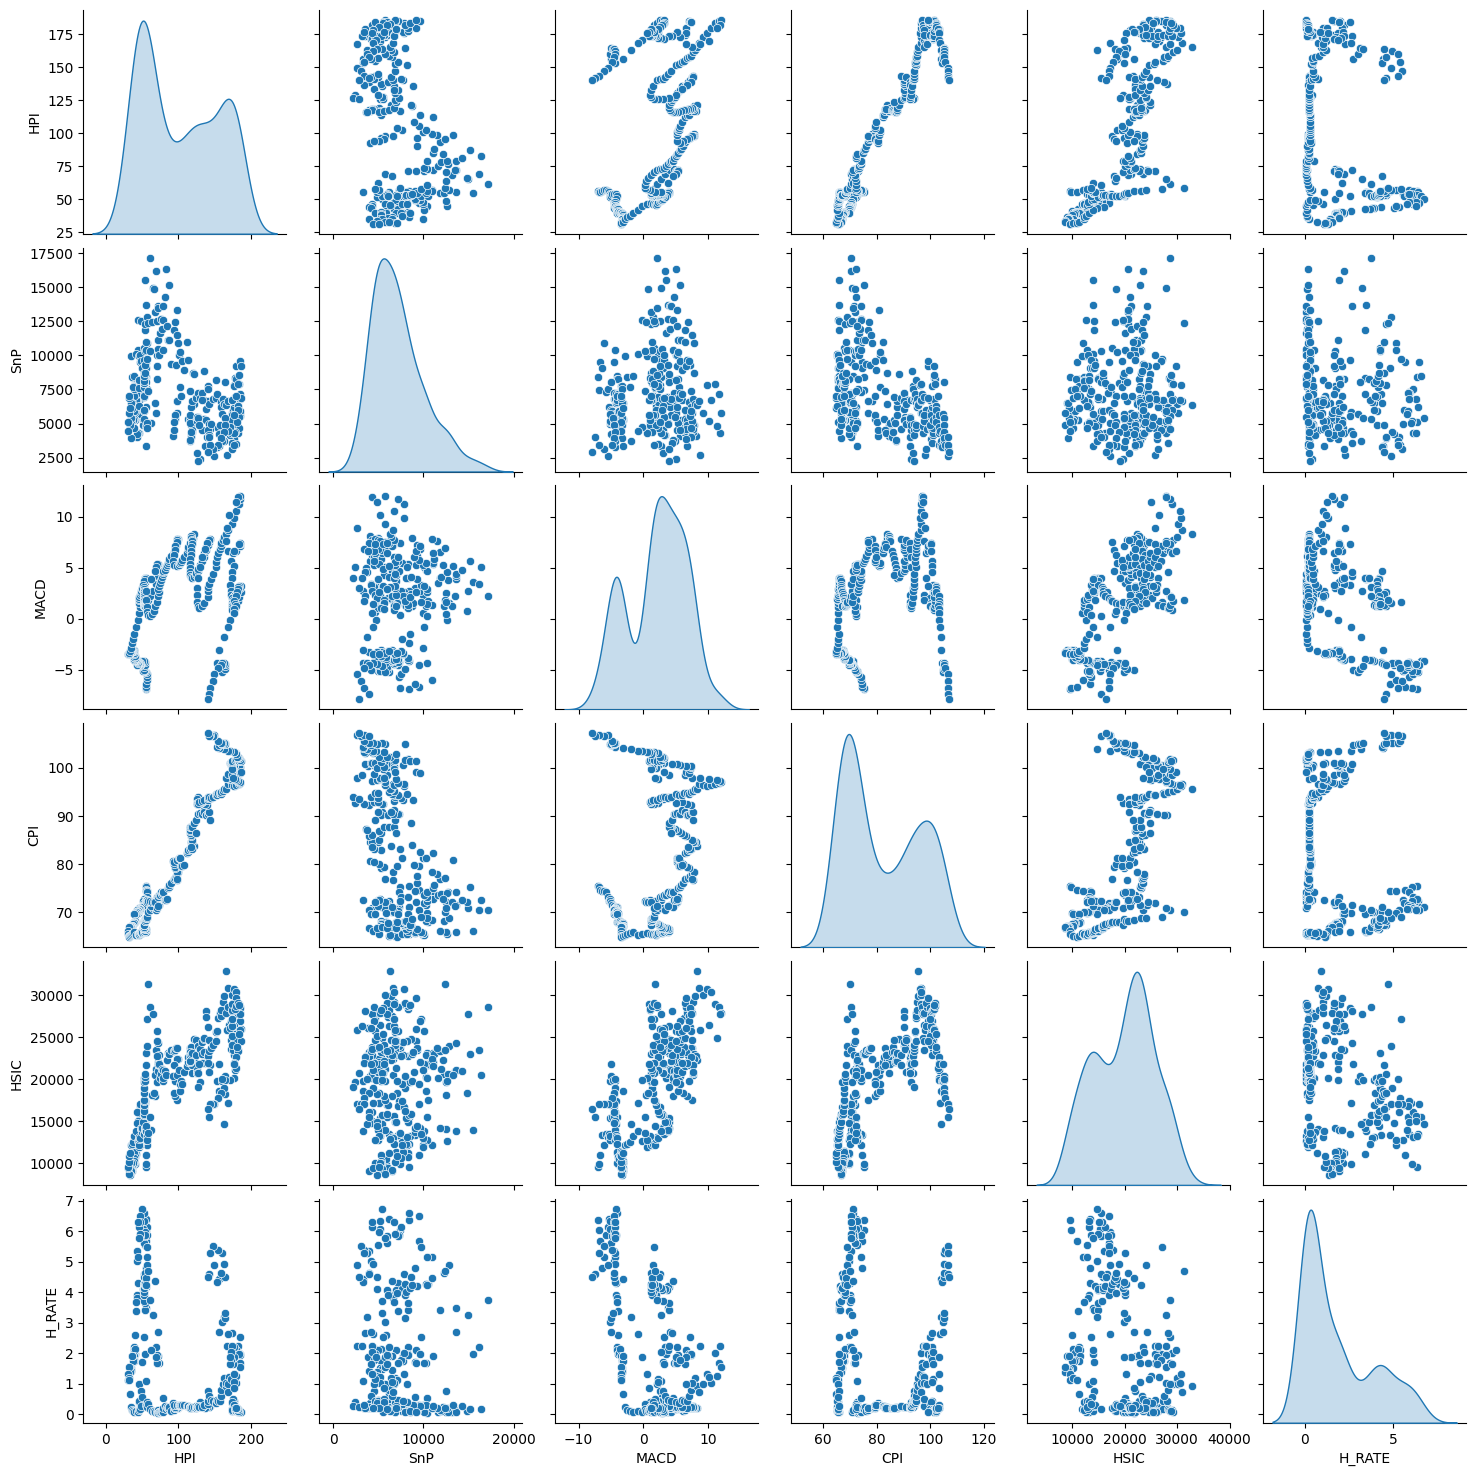

In [ ]:
sns.pairplot(data=data, diag_kind='kde')
plt.show()


**Modified Data Set:**
* Lag1_HPI: The Last HPI record.

* Lag2_HPI: The 2nd last HPI record.

* macd: (Lag1_HPI*MACD/50)+Lag2_HPI

* SnPHPI2: HPI/Snp

* SnpHPI2log: log(HPI/SnP)

These additional features aim to improve the relationship between the features and the HPI. We will choose the features that can improve the MSE during training.



In [ ]:
data_TimeSeries = pd.read_excel('BigData.xlsx', sheet_name ='data_TimeSeries')
data_TimeSeries.head()

,DATE,HPI,Lag1_HPI,Lag2_HPI,macd,SnPHPI2,SnPHPI2log,SnP,MACD,CPI,HSIC,H_RATE
0,1999-01-01,55.79,55.33,52.19,44.534459,0.006574,-2.182197,8417,-6.918074,75.5,9506.900391,6.37054
1,1999-02-01,55.47,55.79,55.33,47.729376,0.007488,-2.125658,7451,-6.811816,75.2,9858.490234,6.04000
2,1999-03-01,55.29,55.47,55.79,48.395520,0.005835,-2.233985,9507,-6.665297,74.7,10942.200195,5.67411
3,1999-04-01,56.18,55.29,55.47,48.388957,0.006102,-2.214530,9061,-6.403547,74.5,13333.200195,4.79241
4,1999-05-01,57.02,56.18,55.29,48.482681,0.005141,-2.288959,10928,-6.058490,74.4,12147.120117,5.16518


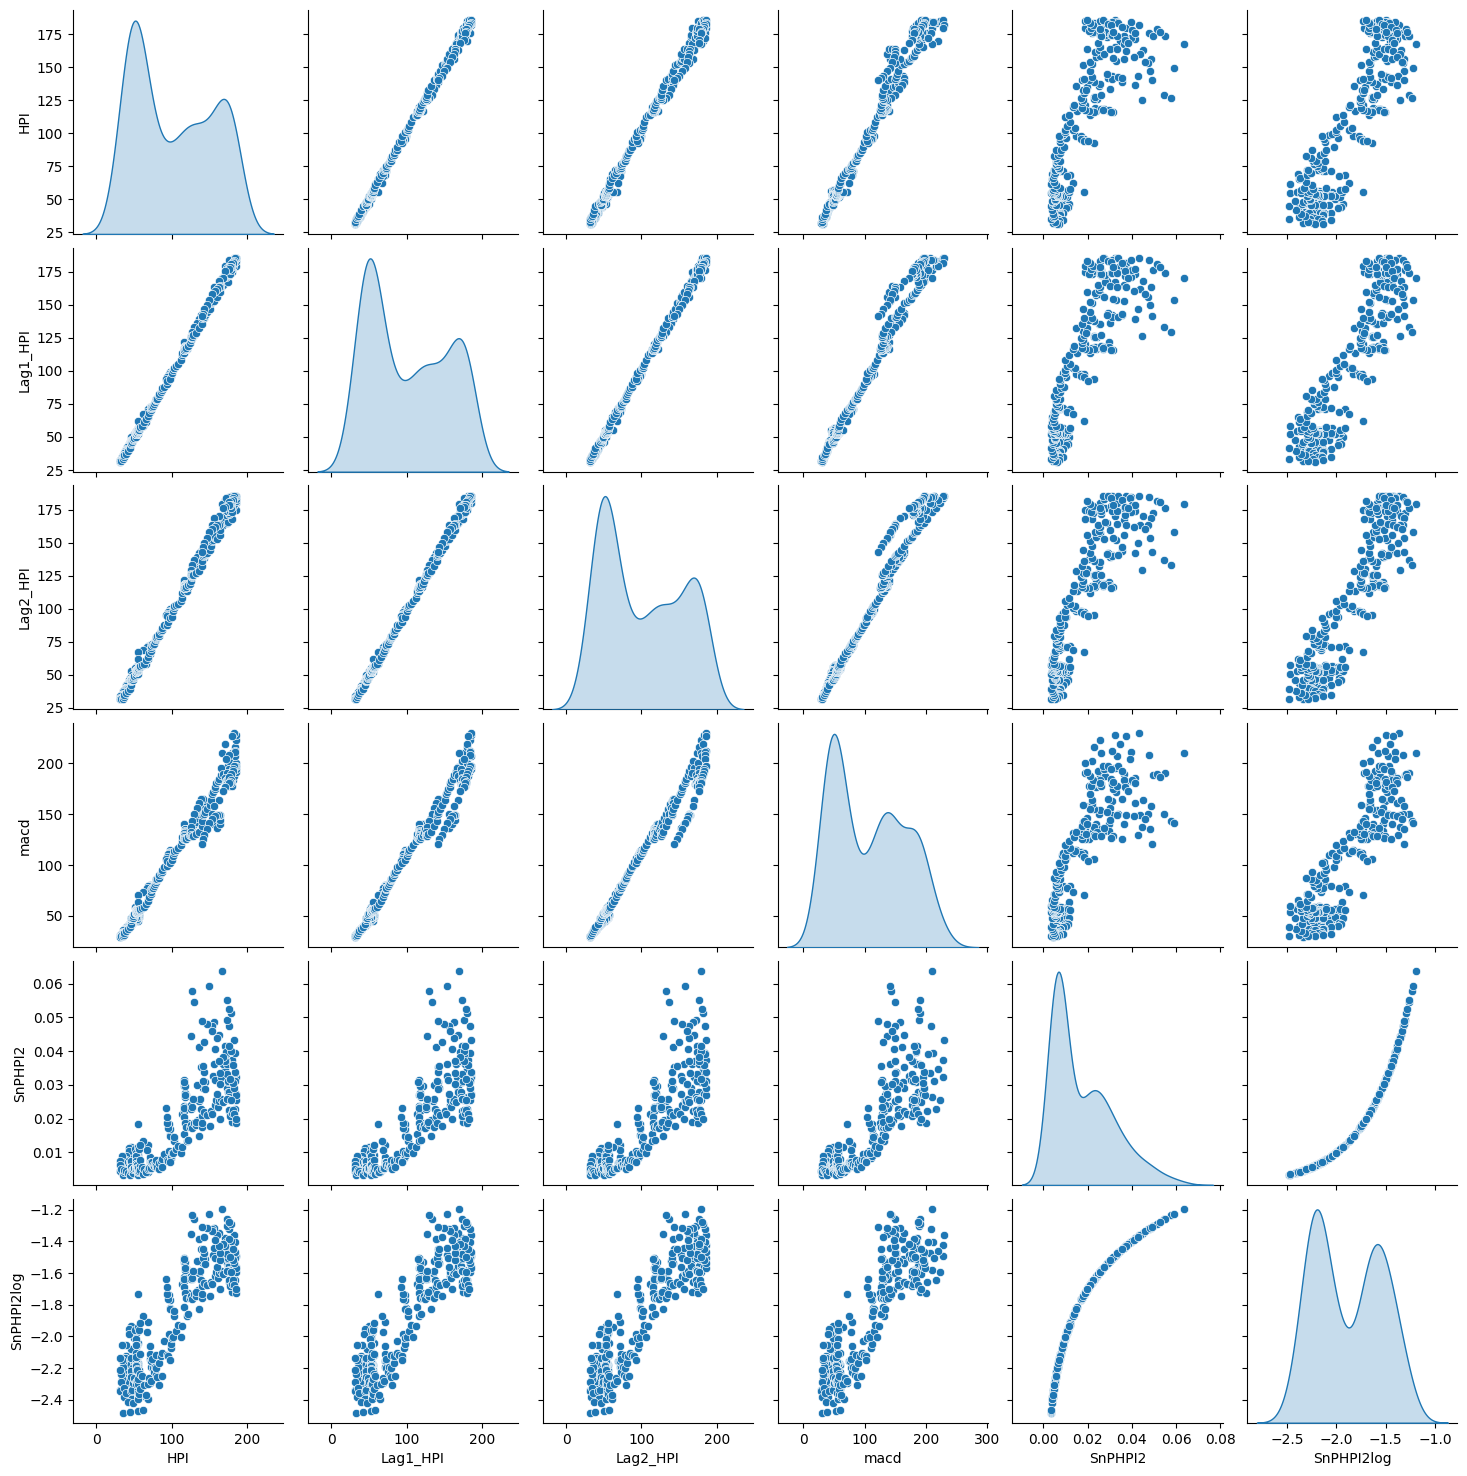

In [ ]:
sns.pairplot(data=data_TimeSeries[['HPI', 'Lag1_HPI','Lag2_HPI', 'macd', 'SnPHPI2','SnPHPI2log']], diag_kind='kde')
plt.show()

# Methods and Descriptive Results


We aim to find the best model to predict the future trend of the housing price index in Hong Kong.
We also try to improve the model by modifying the data set.

**Model selection:**

* LinearRegression

* DecisionTreeRegressor

* RandomForestRegressor

* XGBRegressor

**Data Set selection**

* data[['SnP', 'MACD', 'CPI', 'HSIC', 'H_RATE']]

* data_TimeSeries[['macd', 'SnP', 'MACD', 'CPI', 'HSIC', 	'H_RATE']]


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

We set N = 36 months, you could modify this to see futher

In [ ]:
#init data
N = 36

dataX = np.array(data[['SnP','MACD','CPI','HSIC','H_RATE']])
datay =np.array(data['HPI'])


**Intro**

* To predict the future N months HPI, we decided to mismatch the row of the X and y. We use the N-next month's HPI to train the model.

* For example: If we set N = 36, which is 3 years, We may use the features on 1/1/1999 to predict with the features on 1/1/2002.

* Delete the Rows that have missing values after the mismatching.

In [ ]:
X = dataX[:(dataX.shape[0]-N),:]
y = datay[N:]
X_train, y_train, X_test, y_test = X[:(X.shape[0]-N),:], y[:(y.shape[0]-N)], X[(X.shape[0]-N):,:], y[(y.shape[0]-N):]




*   Use LinearRegression to show how the model works to predict the future housing price index.

**Example**






In [ ]:
# Create a linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train,y_train)
# Make predictions
y_predn = model.predict(X_test)
# Evaluate the model
print(y_predn)
mse = mean_squared_error(y_test, y_predn)
print(f'Mean Squared Error: {mse}')




[183.36608287 182.33369045 181.48869115 176.18699754 177.30488806
 175.26106263 170.69386486 173.33235369 175.4990867  170.02526747
 180.68635603 185.42023361 181.92473542 184.37698532 178.73943067
 175.6940809  177.08134785 175.99504528 174.80716754 176.13215907
 178.57701177 177.4838531  162.81815013 178.31610707 172.34703144
 178.86644795 176.53533161 180.69416904 164.62259302 173.73032523
 159.83878948 174.89933767 178.63982636 176.54987384 183.29687835
 185.64988568]
Mean Squared Error: 286.28987214236054


* Here We plot a graph to compare HPI prediction with the Real HPI. ⏭

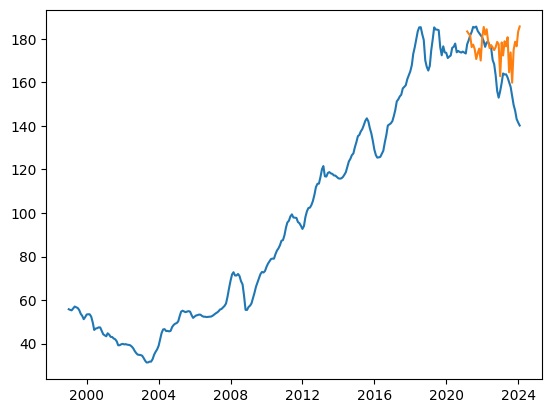

In [ ]:
date = np.array(data[['DATE']])
plt.plot(date, datay)
plt.plot(date[(len(date)-len(y_predn)):], y_predn)
plt.show()

As we can see, the price prediction is not fit at all. However, We could see that the trend is quite similar.
Therefore, We can try to use the price prediction as a percentage change to further improve our prediction.

In [ ]:

pc = []
for i in range(len(y_predn)):
  if i == 0:
    pc.append(datay[(len(date)-len(y_predn))])
  else:
    pc.append(pc[i-1]+(pc[i-1]*((y_predn[i]-y_predn[i-1])/y_predn[i])))


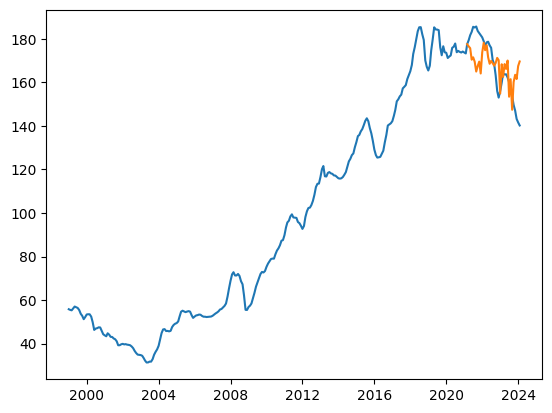

In [ ]:
plt.plot(date, datay)
plt.plot(date[(len(date)-len(y_predn)):], pc)
plt.show()

We can see that the prediction here is more fit to the real HPI index.



 # Cross-validation to select models:

 Let cv = 5

* LinearRegression

* DecisionTreeRegressor

* RandomForestRegressor

* XGBRegressor


In [ ]:
def cross_validation(X,y):
  #Create a list of models
  models = [
      LinearRegression(),
      DecisionTreeRegressor(),
      RandomForestRegressor(),
      xgb.XGBRegressor(),
  ]

  #Perform cross-validation for each model
  d1perform = []
  for model in models:
      scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
      mse_scores = -scores
      average_mse = mse_scores.mean()
      d1perform.append(average_mse)
      print('Model:', type(model))
      print('MSE Scores:', mse_scores)
      print('Average MSE:', average_mse)
      print()

  return d1perform


In [ ]:
dataX = np.array(data[['SnP','MACD','CPI','HSIC','H_RATE']])
datay =np.array(data['HPI'])
X = dataX[:(dataX.shape[0]-N),:]
y = datay[N:]
performance_dataset1 = cross_validation(X,y)

Model: <class 'sklearn.linear_model._base.LinearRegression'>
MSE Scores: [149.69797064 258.92214921  69.11481762 370.71090803 505.12478473]
Average MSE: 270.7141260471104

Model: <class 'sklearn.tree._classes.DecisionTreeRegressor'>
MSE Scores: [1655.29395     904.02616604  723.92593208  224.91339057  253.90715283]
Average MSE: 752.4133183018869

Model: <class 'sklearn.ensemble._forest.RandomForestRegressor'>
MSE Scores: [1789.36054262  626.30352691  915.85221268  219.86319566  159.97229832]
Average MSE: 742.2703552361586

Model: <class 'xgboost.sklearn.XGBRegressor'>
MSE Scores: [1980.79125784  651.15944218 1070.64583808  957.44908403  198.74972016]
Average MSE: 971.7590684579405



In [ ]:
dataX = np.array(data_TimeSeries[['macd','SnP',	'MACD','CPI',	'HSIC',	'H_RATE']])
datay =np.array(data_TimeSeries['HPI'])
X = dataX[:(dataX.shape[0]-N),:]
y = datay[N:]
performance_dataset2 = cross_validation(X,y)

Model: <class 'sklearn.linear_model._base.LinearRegression'>
MSE Scores: [133.80369372 187.46898526  91.0401806  268.83979345 265.05553257]
Average MSE: 189.24163711856795

Model: <class 'sklearn.tree._classes.DecisionTreeRegressor'>
MSE Scores: [1628.12000926  700.96194151  544.60081132  724.3630434   243.23886981]
Average MSE: 768.2569350593991

Model: <class 'sklearn.ensemble._forest.RandomForestRegressor'>
MSE Scores: [1694.52027958  387.44913294  532.93677604  219.41981654  147.17879971]
Average MSE: 596.3009609605361

Model: <class 'xgboost.sklearn.XGBRegressor'>
MSE Scores: [1666.77081536  427.26714459  790.95999173  423.54605794  175.57660321]
Average MSE: 696.8241225670436



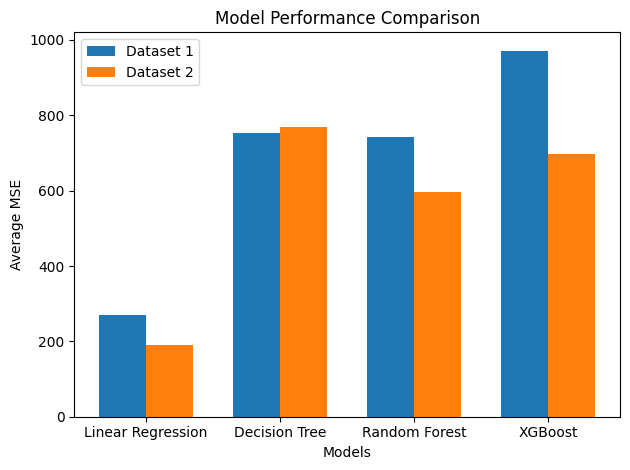

In [ ]:
# Create a list of model names
model_names = ['Linear Regression', 'Decision Tree', 'Random Forest', 'XGBoost']

# Set up the bar chart
fig, ax = plt.subplots()
bar_width = 0.35
index = np.arange(len(model_names))

# Plot the bars for the first dataset
rects1 = ax.bar(index, performance_dataset1, bar_width, label='Dataset 1')

# Plot the bars for the second dataset
rects2 = ax.bar(index + bar_width, performance_dataset2, bar_width, label='Dataset 2')

# Add labels and title
ax.set_xlabel('Models')
ax.set_ylabel('Average MSE')
ax.set_title('Model Performance Comparison')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(model_names)
ax.legend()

# Adjust the layout to prevent overlapping labels
fig.tight_layout()

# Show the plot
plt.show()

* we can see that the Linear Regression with data set 2 have the lowest average MSE.

Therefore, We may choose to train and use the Linear Regression model with dataset 2.

In [ ]:
#data set 2
dataX = np.array(data_TimeSeries[['macd','SnP',	'MACD','CPI',	'HSIC',	'H_RATE']])
datay =np.array(data_TimeSeries['HPI'])
X = dataX[:(dataX.shape[0]-N),:]
y = datay[N:]
X_train, y_train, X_test, y_test = X[:(X.shape[0]-N),:], y[:(y.shape[0]-N)], X[(X.shape[0]-N):,:], y[(y.shape[0]-N):]

# Train the model
m1 = LinearRegression()
m2 = DecisionTreeRegressor()
m3 = RandomForestRegressor()
m4 = xgb.XGBRegressor()
m1.fit(X_train,y_train)
m2.fit(X_train,y_train)
m3.fit(X_train,y_train)
m4.fit(X_train,y_train)
# Make predictions
pred1 = m1.predict(X_test)
mse = mean_squared_error(y_test, pred1)
print(f'Mean Squared Error of m1: {mse}')

pred2 = m2.predict(X_test)
mse = mean_squared_error(y_test, pred2)
print(f'Mean Squared Error of m2: {mse}')

pred3 = m3.predict(X_test)
mse = mean_squared_error(y_test, pred3)
print(f'Mean Squared Error of m3: {mse}')

pred4 = m4.predict(X_test)
mse = mean_squared_error(y_test, pred4)
print(f'Mean Squared Error of m4: {mse}')


Mean Squared Error of m1: 283.9972613651664
Mean Squared Error of m2: 257.23124722222224
Mean Squared Error of m3: 228.10349162444496
Mean Squared Error of m4: 251.55262943328665


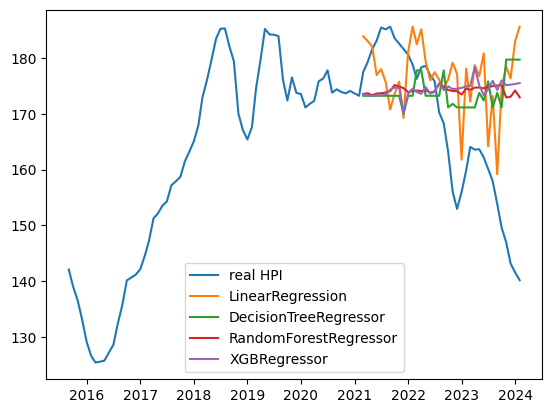

In [ ]:
date = np.array(data[['DATE']])
plt.plot(date[200:], datay[200:], label = 'real HPI')
plt.plot(date[(len(date)-len(pred1)):], pred1, label = 'LinearRegression')
plt.plot(date[(len(date)-len(pred2)):], pred2, label = 'DecisionTreeRegressor')
plt.plot(date[(len(date)-len(pred3)):], pred3, label = 'RandomForestRegressor')
plt.plot(date[(len(date)-len(pred4)):], pred4, label = 'XGBRegressor')
plt.legend()
plt.show()


In [ ]:
pc1 = []
for i in range(len(pred1)):
  if i == 0:
    pc1.append(datay[(len(date)-len(pred1))])
  else:
    pc1.append(pc1[i-1]+(pc1[i-1]*((pred1[i]-pred1[i-1])/pred1[i])))

pc2 = []
for i in range(len(pred2)):
  if i == 0:
    pc2.append(datay[(len(date)-len(pred2))])
  else:
    pc2.append(pc2[i-1]+(pc2[i-1]*((pred2[i]-pred2[i-1])/pred2[i])))

pc3 = []
for i in range(len(pred3)):
  if i == 0:
    pc3.append(datay[(len(date)-len(pred3))])
  else:
    pc3.append(pc3[i-1]+(pc3[i-1]*((pred3[i]-pred3[i-1])/pred3[i])))

pc4 = []
for i in range(len(pred4)):
  if i == 0:
    pc4.append(datay[(len(date)-len(pred4))])
  else:
    pc4.append(pc4[i-1]+(pc4[i-1]*((pred4[i]-pred4[i-1])/pred4[i])))

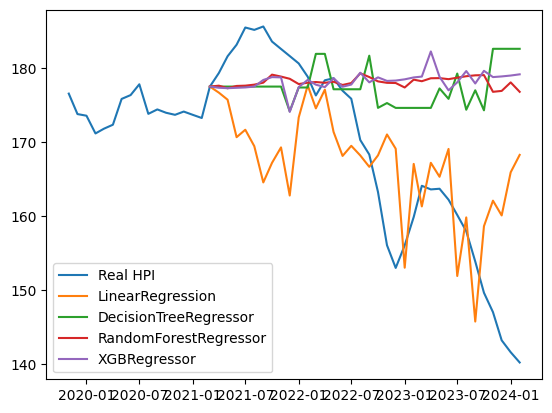

In [ ]:
plt.plot(date[250:], datay[250:], label = 'Real HPI')
plt.plot(date[(len(date)-len(pred1)):], pc1,label = 'LinearRegression')
plt.plot(date[(len(date)-len(pred2)):], pc2, label = 'DecisionTreeRegressor')
plt.plot(date[(len(date)-len(pred3)):], pc3, label = 'RandomForestRegressor')
plt.plot(date[(len(date)-len(pred4)):], pc4, label = 'XGBRegressor')
plt.legend()
plt.show()

# Final Result

* LinearRegression Model with dataset 2

Prediction of the Housing Price index for the next 36 months:

In [ ]:
Theta = m1.coef_
print('coefficient:',Theta)
bias = m1.intercept_
print('intercept:', bias)

coefficient: [-6.22640495e-01  6.60083188e-04  4.77940928e+00  5.23517462e+00
  9.48244508e-04 -4.88521198e+00]
intercept: -270.4126592596285


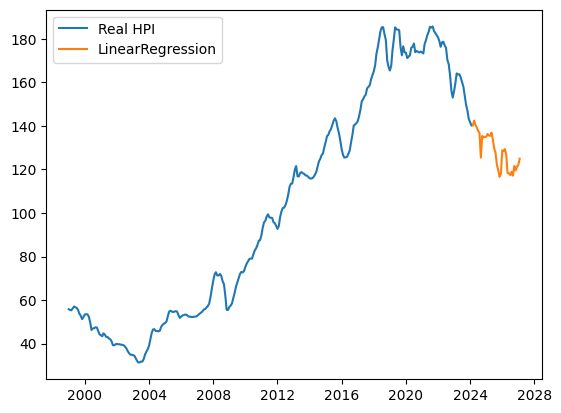

In [ ]:
newdate = np.array(data['DATE']+ pd.DateOffset(months=N))
prediction = m1.predict(dataX[(len(dataX)-N):, :])
pcT = []
for i in range(len(prediction)):
  if i == 0:
    pcT.append(datay[len(date)-1])
  else:
    pcT.append(pcT[i-1]+(pcT[i-1]*((prediction[i]-prediction[i-1])/prediction[i])))
plt.plot( date,datay, label = 'Real HPI')
plt.plot( newdate[(len(date)-N):] ,pcT,label = 'LinearRegression')
plt.legend()
plt.show()